In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from scipy import signal

In [2]:
#input brain mri image
img = cv2.imread('brain_tumor.jpeg',0)
r,c = img.shape
print(r,c)

218 180


(-0.5, 179.5, 217.5, -0.5)

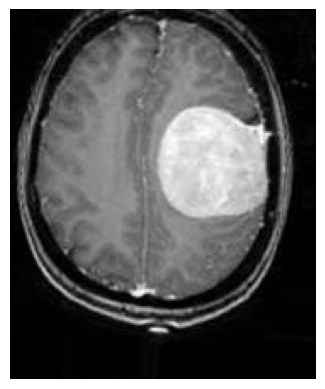

In [3]:
plt.imshow(img,cmap = 'gray')
plt.axis('off')

#img = cv2.imread('Blurr_moon.tif',0)
#creating enhanced Laplacian mask
mask = [[0,1,0],[1,-5,1],[0,1,0]]
#mask1 =[[0,-1,0],[-1,5,-1],[0,-1,0]]
#convolve image and mask
output = signal.convolve2d(img,mask)
#plot the original and filtered image
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img,cmap = 'gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(output,cmap = 'gray')
plt.title("Sharpened Image Using Enhanced Laplacian Mask")

In [4]:
# apply simple thresholding with a hardcoded threshold value
(T, threshInv) = cv2.threshold(img, 127, 255,
cv2.THRESH_BINARY_INV)
cv2.imshow("Simple Thresholding", threshInv)
cv2.waitKey(0)

-1

In [26]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,3,2)
cv2.imshow("Adaptive Thresholding", th3)
cv2.waitKey(0)

-1

218 180


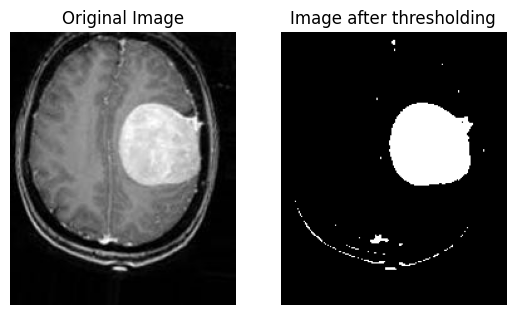

In [4]:
img = cv2.imread('brain_tumor.jpeg',0)
r,c = img.shape
print(r,c)
T = 160
original = img.copy()
#processing
for i in range(r): 
    for j in range(c):
        if img[i,j] > T:
            img[i,j] = 255
        else:
            img[i,j] = 0

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(original,cmap = 'gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.title("Image after thresholding")
plt.axis('off')
plt.imshow(img,cmap = 'gray')

We have found noise in the image after performing thresholding.

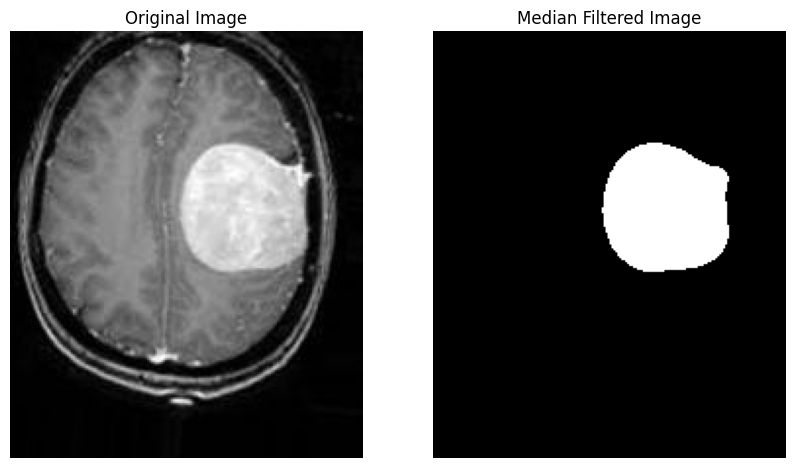

In [5]:
img = cv2.medianBlur(img,11)
# plot the original and filtered image
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Original Image")
plt.imshow(original,cmap = 'gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("Median Filtered Image")
plt.imshow(img,cmap = 'gray')
 
# # Showing the image
# plt.figure(figsize = (10,8))
# plt.subplot(1,2,1)
# plt.axis('off')
# plt.imshow(original,cmap = 'gray')
# plt.title("Original Image")
# plt.subplot(1,2,2)
# plt.title("Smoothenend Image")
# plt.axis('off')
# plt.imshow(img,cmap = 'gray')
# cv2.namedWindow("Original", cv2.WINDOW_NORMAL)
# cv2.resizeWindow("Original",500, 500)


# Naming a window
# cv2.namedWindow("Original", cv2.WINDOW_NORMAL)  
# Using resizeWindow()
# cv2.resizeWindow("Smoothened Image", 500, 500)


In [ ]:
gaussian = cv2.GaussianBlur(img, (5, 5), 0)
cv2.imshow('Original', original)
# cv2.resizeWindow("Original Image", 500, 500)
cv2.imshow('Smothened Image',gaussian)
# cv2.resizeWindow("Smoothened Image", 500, 500)
cv2.waitKey()
cv2.destroyAllWindows()